## Imports for drawing a plot and drawing regression-lines

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Loading of data and writing to the plot arrays

In [241]:
hemnet_data = pd.read_csv("data_assignment2.csv")

# Initalize numpy arrays
x_vals = np.array([])
y_vals = np.array([])
for i, row in hemnet_data.iterrows():
    # If there exists both a living area and selling price value append to numpy arrays
    if row['Selling_price'] != None and row['Living_area'] != None: 
        x_vals = np.append(x_vals,row['Living_area'])
        y_vals = np.append(y_vals,row['Selling_price'])

## Drawing of scatter plot

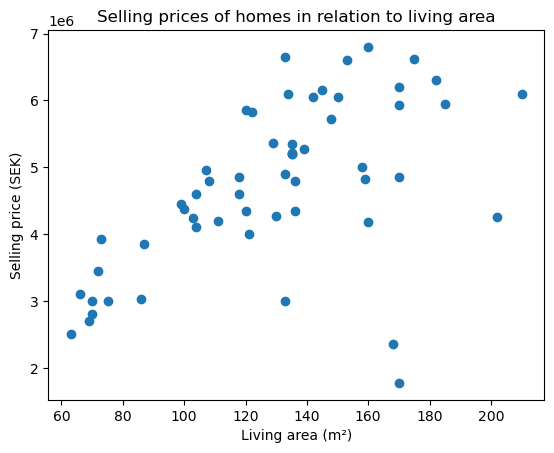

In [242]:
# Draw the scatter plot to get a visual understanding of the dataset
plt.scatter(x_vals, y_vals)
plt.title("Selling prices of homes in relation to living area")
plt.xlabel("Living area (m\u00b2)")
plt.ylabel("Selling price (SEK)")
plt.show()

## Regression line (1a)

In [243]:
# Turn x_vals & y_vals into 2D arrays
x_vals= x_vals.reshape(-1, 1)
y_vals= y_vals.reshape(-1, 1)

model = LinearRegression().fit(x_vals, y_vals)

In [244]:
# Create 10,000 points between the lowest and highest living area in the dataset.
xfit = np.linspace(hemnet_data['Living_area'].min(), hemnet_data['Living_area'].max(), 10000)

# Calculate the predicted value for all these 10,000 points following and in so
# creating a regression-line
yfit = model.predict(xfit[:, np.newaxis])

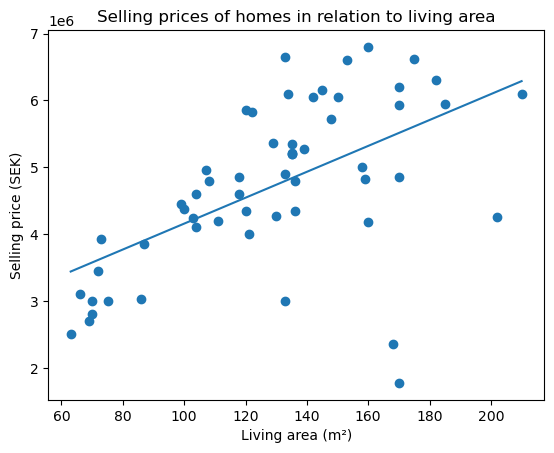

In [245]:
# Draw plot based on the previously calculated y-values following the x-values
# This plot is not cleaned from any inputs
plt.scatter(x_vals,y_vals)
plt.title("Selling prices of homes in relation to living area")
plt.xlabel("Living area (m\u00b2)")
plt.ylabel("Selling price (SEK)")
plt.plot(xfit,yfit)
plt.show()

### Cleaned version of data (1a)

We decided to remove all datapoints that are differing from the predicted value by 50% or more to be clenead out of the dataset.
This since these datapoints vary of in a significant way beyond the living area of the house. Causes we can only speculate in but factors such as the condition of the house may factor in the selling price or human error has taken place.
Perhaps biarea and living area has been summed up into only living area or simular.

In [272]:
cleaned_x = np.array([])
cleaned_y = np.array([])
for i in range(len(x_vals)):
    difference = model.predict([x_vals[i]]) / y_vals[i]
    if  difference > 1.5 or difference < 0.5:
        # If the value is varying more then 50% beyond the predicted value don't include in cleaned data
        pass
    else: # Else include in cleaned data
        cleaned_x = np.append(cleaned_x, x_vals[i])
        cleaned_y = np.append(cleaned_y, y_vals[i])
        
print("datapoints cleaned out due to to great variance: ", len(x_vals)-len(cleaned_x))

datapoints cleaned out due to to great variance:  4


In [273]:
# Creating a new DataFrame for the clened data.
clean_dict = {"Living_area": cleaned_x, "Selling_price": cleaned_y}
clean_df = pd.DataFrame(data=clean_dict)

In [274]:
# Redefine the model with the cleaned data 
model = LinearRegression().fit(cleaned_x.reshape(-1,1), cleaned_y.reshape(-1,1))
# Create 10,000 points between the lowest and highest living area in the dataset.
xfit = np.linspace(clean_df['Living_area'].min(), clean_df['Living_area'].max(), 10000)

# Calculate the predicted value for all these 10,000 points following and in so
# creating a regression-line
yfit = model.predict(xfit[:, np.newaxis])

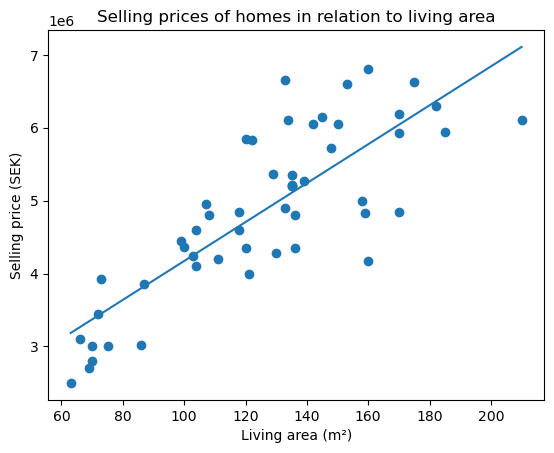

In [275]:
# Draw plot based on the previously calculated y-values following the x-values
plt.scatter(cleaned_x,cleaned_y)
plt.title("Selling prices of homes in relation to living area")
plt.xlabel("Living area (m\u00b2)")
plt.ylabel("Selling price (SEK)")
plt.plot(xfit,yfit)
plt.show()

## The values of the slope and intercept of the regression line (1b)

In [276]:
# Coefficent value of regression-line
print("The coefficient for the regression line:",float(model.coef_))

The coefficient for the regression line: 26686.12237891471


In [277]:
# Intercept value of regression-line
print("The intercept-value for the regression line:",float(model.intercept_))

The intercept-value for the regression line: 1504030.048049042


## Predictions of prices based on Living area (1c)

In [278]:
# Answers 1c
# Predicted price for a house of 100, 150 & 200 square meters respectivly
print("100 sq meters:",int(model.predict([[100]])))
print("150 sq meters:",int(model.predict([[150]])))
print("200 sq meters:",int(model.predict([[200]])))

100 sq meters: 4172642
150 sq meters: 5506948
200 sq meters: 6841254


## Residual plot (1d)

In [279]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [280]:
linear_model = ols('Selling_price ~ Living_area', data=clean_df).fit()

# display the model's summary to get an overview before ploting
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     100.4
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.50e-13
Time:                        14:45:55   Log-Likelihood:                -769.89
No. Observations:                  52   AIC:                             1544.
Df Residuals:                      50   BIC:                             1548.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.504e+06   3.47e+05      4.334      

eval_env: 1


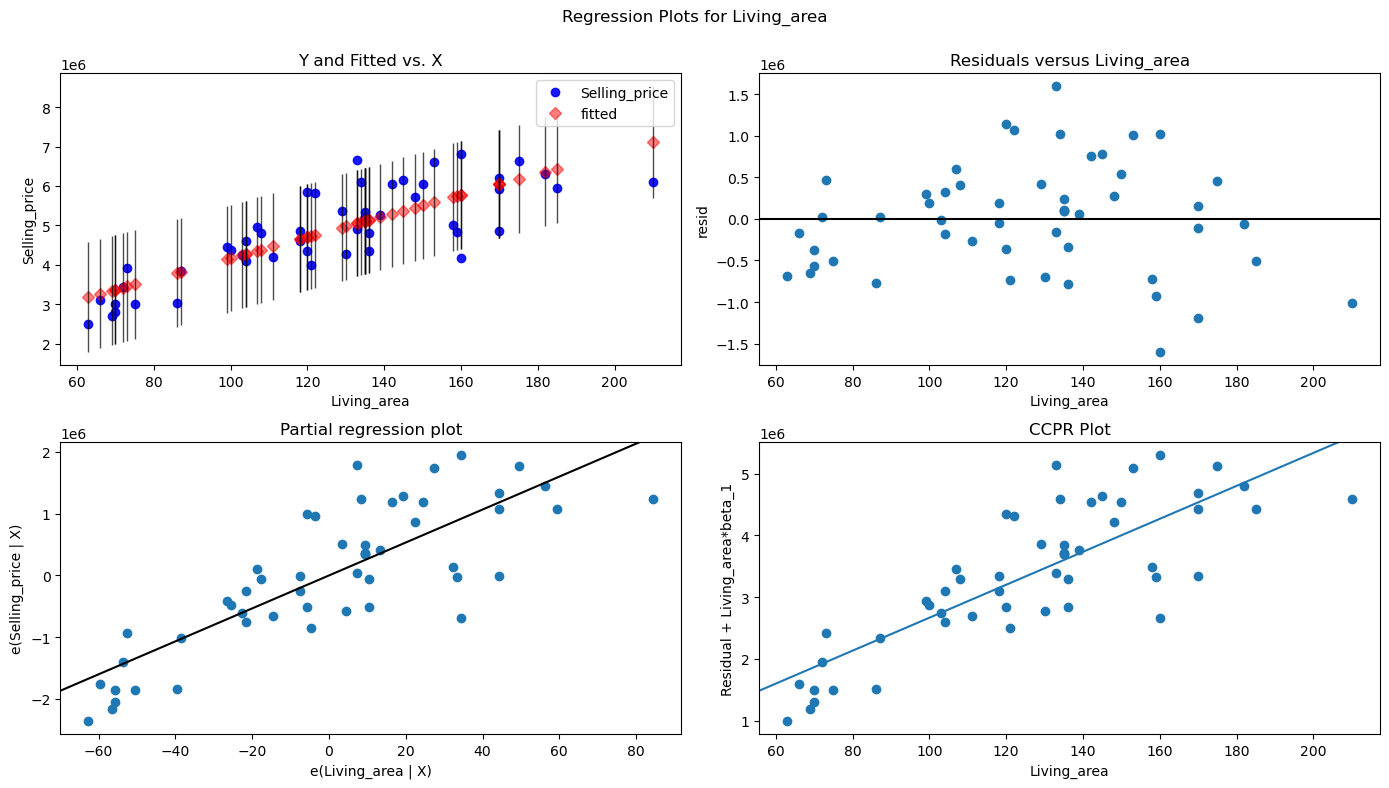

In [281]:
fig = plt.figure(figsize=(14, 8))
# Plotting regression plots
fig = sm.graphics.plot_regress_exog(linear_model,'Living_area', fig=fig)

#Task 1d

### Why did we get these results? (1e)

If we look at the residual plot we can see that there is a lot of deviation from the predicted values in a varying magnitude. The deviations themselfs does follow some pattern where it is gaining in the median range of the given datapoints but the variation overall is pretty limited.
Worth noting is that we can easly see that we have sorted out all values of a deviation of 50% or more since 1.5 is the lower and upper bound of the residual.

The model could be improved in a various amount of ways but we think that including more data about each house sale in the analysis would be the best way of moving forward.
For example we could try to make judgment on the houses depending on their ages and number of rooms since both of these factors could impact the price of the house. Not to mention that if you get a large amount of land included in your house purchase that could also impact the price.

Overall we think that the datapoints follows our regression line and in so a trend can be found that houses sell for more if they have a larger living area.
Moving forward we would try to utelize other variables such as: land size, number of rooms and the age of the house to get a more accurate prediction of the sales price of each house.